# Assignment 1 - Data Visualization with Python 
## London Crime Data (2008 - 2016)
### Naila Qisthi Azzahra
### PYTN-KS08-018

### Introduction
Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.
#### Source Data :
https://www.kaggle.com/datasets/jboysen/london-crime
- lsoa_code : Policing Area
- borough : london borough for which statistic is related
- major_category : the major crime category
- minor_category : the minor crime category
- value : the count of the crime for that particular borough, in that particular month
- year : the year of the summary statistic
- month : the month of the summary statistic

#### Objectives
- Able to make decisions using data in scientific manner
- Visualized the data

### Import Library
Step pertama adalah melakukan import library yang akan digunakan pada project ini

In [1]:
#for data preprocessing
import numpy as np
import pandas as pd

#for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

### Data Loading

In [2]:
df_crime = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
#melihat 5 baris teratas data
df_crime.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [4]:
#melihat 5 baris terbawah
df_crime.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [5]:
#melihat informasi dasar dari kerangka data
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
#size of data frame (rows, columns)
df_crime.shape

(13490604, 7)

In [7]:
#rename column agar make sense
df_crime.rename(columns = {'lsoa_code' : "Police code", 'borough':'District', 'major_category' : 'Crime category', 'minor_category' : 'Details crime', 'value':'Numbers of Crime', 'year':'Year', 'month':'Month'}, inplace=True)
df_crime.head(5)

,Police code,District,Crime category,Details crime,Numbers of Crime,Year,Month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Mengubah tipe data Year dan Month menjadi string, agar tidak membingungkan

In [8]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Police code       object
 1   District          object
 2   Crime category    object
 3   Details crime     object
 4   Numbers of Crime  int64 
 5   Year              int64 
 6   Month             int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [9]:
#check missing value
df_crime.isna().sum()

Police code         0
District            0
Crime category      0
Details crime       0
Numbers of Crime    0
Year                0
Month               0
dtype: int64

In [10]:
#melihat unique value pada kolom district
df_crime.District.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [11]:
#melihat number of unique value dari variabel police code
df_crime['Police code'].nunique()

4835

In [12]:
#melihat number of unique value dari variabel police code
df_crime['Crime category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [13]:
#melihat number of unique value dari variabel police code
df_crime['Details crime'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

**Mengubah Index**
   
mengubah index berdasarkan nama District agar memudahkan saat ingin memilih baris sesuai nama daerah

In [14]:
#df_crime.set_index('District', inplace=True)
#df_crime.index.name = None

In [15]:
#df_crime.loc['Croydon']

### Line Plot

In [16]:
year = pd.DataFrame((df_crime[['Year', 'Numbers of Crime']]).groupby(["Year"],  as_index=True)['Numbers of Crime'].sum())
year

,Numbers of Crime
Year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


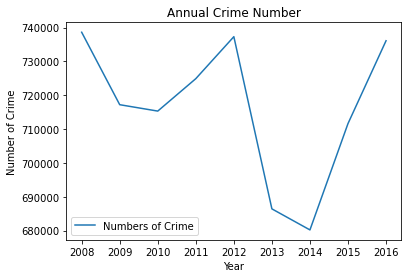

In [17]:
year.index = year.index.map(int)
year.plot(kind='line')

plt.title('Annual Crime Number')
plt.ylabel('Number of Crime')
plt.xlabel('Year')

plt.show()

### Area Plot
Untuk mengetahui daerah dengan tingkat kejahatan yang paling tinggi, maka index akan diganti dengan nama district kemudian dibuat kolom Total yang menyatakan jumlah crime selama periode 2008 - 2016 untuk setiap kota. Lalu data frame akan ditranpose agar bagian district menjadi Index

In [18]:
district = pd.DataFrame(df_crime.groupby(['Year', 'District'], as_index=False)['Numbers of Crime'].sum())
district

,Year,District,Numbers of Crime
0,2008,Barking and Dagenham,17656
1,2008,Barnet,23944
2,2008,Bexley,15305
3,2008,Brent,23504
4,2008,Bromley,24015
...,...,...,...
292,2016,Sutton,10658
293,2016,Tower Hamlets,29253
294,2016,Waltham Forest,20716
295,2016,Wandsworth,23679


In [19]:
#mengganti index dengan District serta variabel year diubah jadi kolom
dv = district.pivot(index='District', columns='Year', values='Numbers of Crime')

#membuat kolom Total crime
dv['Total'] =  dv.sum(axis=1)
dv_sort = dv.sort_values(['Total'], ascending=False)
dv_sort5 = dv_sort.head()
dv_sort5

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
District,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [20]:
#tranpose agar tahun menjadi index
area_plot = dv_sort5.transpose()
areaplot = area_plot.drop('Total', axis=0)
areaplot

District,Westminster,Lambeth,Southwark,Camden,Newham
Year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


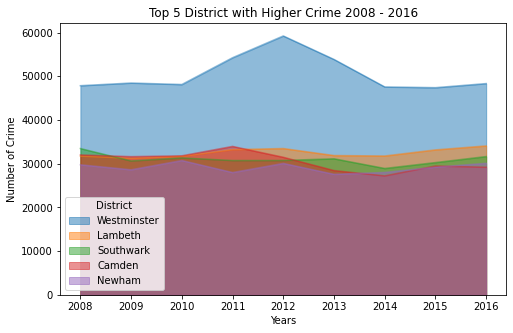

In [21]:
areaplot.plot(kind='area',
               alpha=0.5,
               stacked=False,
               figsize=(8,5))
plt.title('Top 5 District with Higher Crime 2008 - 2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')
plt.show()

### Histogram
Untuk mengetahui distribusi frekuensi dari banyaknya kejahatan yang terjadi di berbagai area London tahun 2016

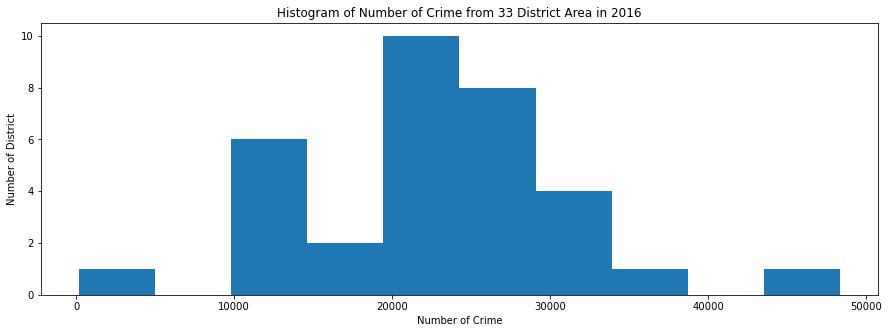

In [22]:
dv_sort[2016].plot(kind='hist',
                  figsize=(15,5))
plt.title('Histogram of Number of Crime from 33 District Area in 2016')
plt.ylabel('Number of District')
plt.xlabel('Number of Crime')

plt.show()

In [23]:
areaplot.iloc[:,0:3]

District,Westminster,Lambeth,Southwark
Year,,,
2008,47846,31717,33470
2009,48456,31225,30623
2010,48116,31671,31320
2011,54243,33224,30723
2012,59226,33473,30737
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


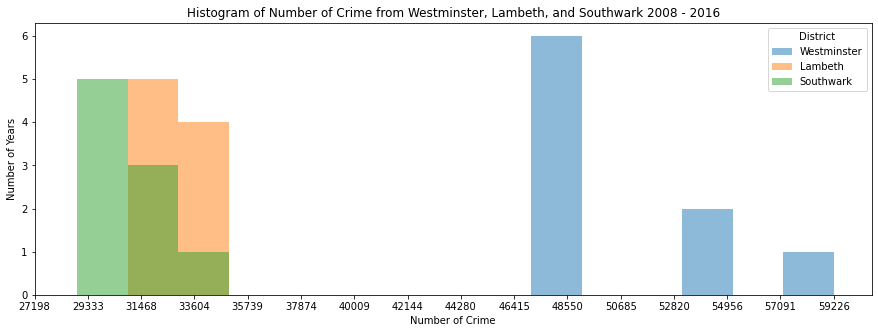

In [24]:
count, bin_edges=np.histogram(areaplot,15)

areaplot.iloc[:,0:3].plot(kind='hist', 
             figsize=(15,5), 
             bins=15,
             alpha=0.5,
             xticks=bin_edges)
plt.title('Histogram of Number of Crime from Westminster, Lambeth, and Southwark 2008 - 2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crime')

plt.show()

### Bar Plot

In [25]:
year

,Numbers of Crime
Year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


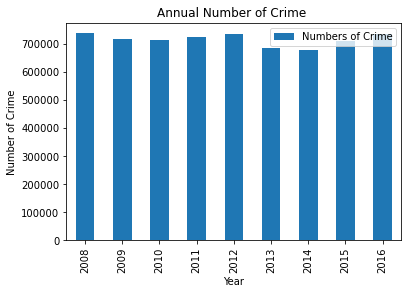

In [26]:
year.plot(kind='bar', 
             figsize=(6,4))
plt.title('Annual Number of Crime ')
plt.ylabel('Number of Crime')
plt.xlabel('Year')

plt.show()

### Pie Chart

In [27]:
#membuat data frame jumlah kejahatan per tahun berdasarkan category kejahatan 
category = pd.DataFrame(df_crime.groupby(['Year', 'Crime category'], as_index=False)['Numbers of Crime'].sum())
category1 = category.pivot(index='Year', columns='Crime category', values='Numbers of Crime')
category1

Crime category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
Year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [28]:
#rename kolom agar lebih singkat
category1.rename(columns = {'Criminal Damage' : "Damage", 'Fraud or Forgery':'Fraud', 'Other Notifiable Offences' : 'Other_Offences', 'Sexual Offences' : 'Sex_Offences', 'Theft and Handling':'Theft', 'Violence Against the Person':'Violence'}, inplace=True)
category1.head(5)

Crime category,Burglary,Damage,Drugs,Fraud,Other_Offences,Robbery,Sex_Offences,Theft,Violence
Year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014


In [29]:
cat = category1.transpose()
cat

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016
Crime category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud,5325,0,0,0,0,0,0,0,0
Other_Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sex_Offences,1273,0,0,0,0,0,0,0,0
Theft,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [30]:
cat['Total'] = cat.sum(axis=1)
cat_sort = cat.sort_values(['Total'], ascending=False)
cat_sort.iloc[:,-1:]

Year,Total
Crime category,
Theft,2661861
Violence,1558081
Burglary,754293
Damage,630938
Drugs,470765
Robbery,258873
Other_Offences,106349
Fraud,5325
Sex_Offences,1273


No handles with labels found to put in legend.


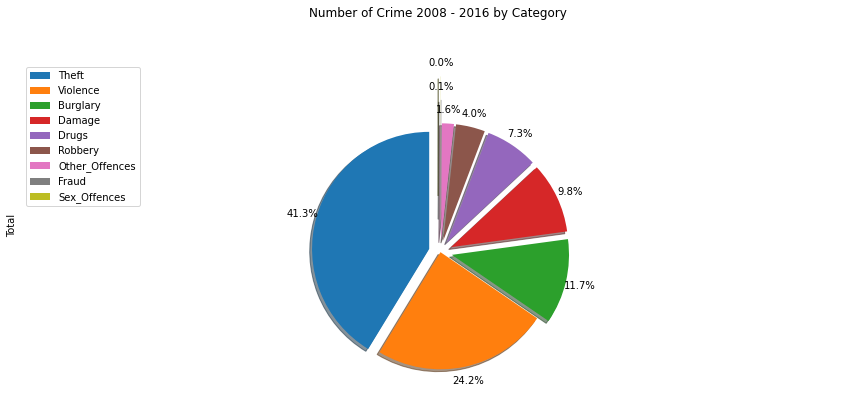

In [31]:
explode_list = [0.1,0,0.1,0.1,0.1,0.1,0.1,0.3,0.5]
cat_sort.iloc[:,-1:].plot(kind='pie',
                         figsize=(15,6),
                         autopct='%1.1f%%',
                         startangle=90,
                         shadow=True,
                         labels=None,
                         subplots=True,
                         pctdistance=1.12,
                         explode=explode_list)
plt.title('Number of Crime 2008 - 2016 by Category ', y =1.12)
plt.axis('equal')
plt.legend(labels=cat_sort.index, loc='upper left')

plt.show()

### Box Plot

In [32]:
areaplot.iloc[:,3:5]

District,Camden,Newham
Year,,
2008,32010,29752
2009,31612,28610
2010,31804,30728
2011,33956,27978
2012,31472,30067
2013,28435,27577
2014,27198,28005
2015,29477,29217
2016,29183,30090


In [33]:
areaplot.iloc[:,3:5].describe()

District,Camden,Newham
count,9.000000,9.000000
mean,30571.888889,29113.777778
std,2121.547633,1119.162385
min,27198.000000,27577.000000
25%,29183.000000,28005.000000
50%,31472.000000,29217.000000
75%,31804.000000,30067.000000
max,33956.000000,30728.000000


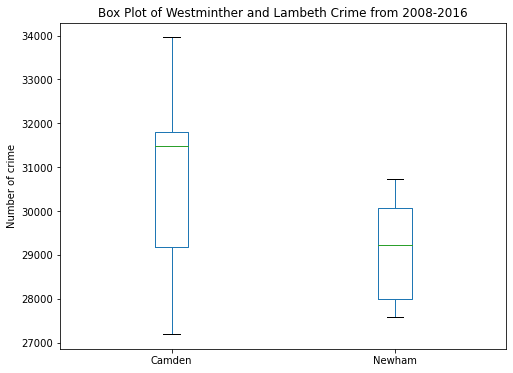

In [34]:
areaplot.iloc[:,3:5].plot(kind='box', figsize=(8,6))
plt.title('Box Plot of Westminther and Lambeth Crime from 2008-2016')
plt.ylabel('Number of crime')
plt.show()

### Scatter Plot

In [35]:
year

,Numbers of Crime
Year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [36]:
years = year.reset_index(inplace=False)
years

,Year,Numbers of Crime
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


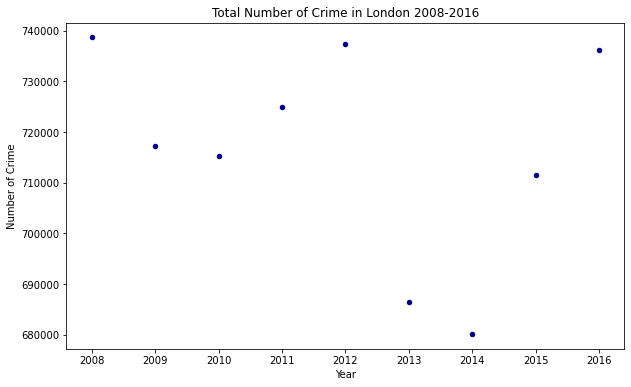

In [37]:
years.plot(kind='scatter', x='Year', y='Numbers of Crime', figsize=(10,6), color='darkblue')

plt.title('Total Number of Crime in London 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')

plt.show()

In [38]:
dist = pd.DataFrame(df_crime.groupby(['District'], as_index=True)['Numbers of Crime'].sum())
dist.insert(0,column = 'Code District', value=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])
dist

,Code District,Numbers of Crime
District,,
Barking and Dagenham,0,149447
Barnet,1,212191
Bexley,2,114136
Brent,3,227551
Bromley,4,184349
Camden,5,275147
City of London,6,780
Croydon,7,260294
Ealing,8,251562


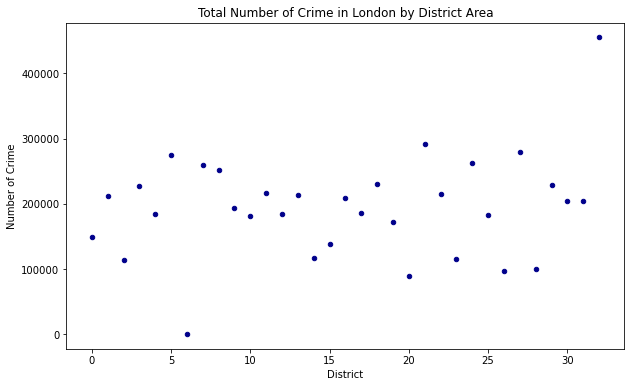

In [39]:
dist.plot(kind='scatter', x='Code District', y='Numbers of Crime', figsize=(10,6), color='darkblue')

plt.title('Total Number of Crime in London by District Area')
plt.xlabel('District')
plt.ylabel('Number of Crime')

plt.show()